回归问题主要关注确定一个唯一的因变量（需要预测的值）和一个或多个数值型自变量（预测变量）之间的关系。  
需要预测的值：即目标变量，target，y，连续值  
预测变量：影响目标变量的因素，predictors，X1...XN，可以是连续值也可以是离散值   
之间的关系：即模型，model，是我们要求解的

#### 简单的线性回归

y=a+bx，尽可能的拟合所有点

人工智能算法要求的是最优解！

<img src="./Img/4.png" width="20%" height="20%">

#### 最优解

Actual Value：真实值，即已知的y  
Predicted value：预测值，是把已知的x带入到公式里面和猜出来的参数a,b计算得到的  
Error：误差，预测值和真实值的差距  
最优解：尽可能的找到一个模型使得整体的误差最小，整体的误差通常叫做损失Loss   
Loss：整体的误差，loss通过损失函数loss function计算得到  
*尽可能的使我们的Loss最小，得到的就是我们的最优解，也即此时的参数a,b最优*

对于线性回归来说，采用的损失函数一般是MSE（Mean Squared Error)  
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$
MSE的取值越小，表示模型的预测结果越接近真实值，模型的预测精度越高。

#### 多元线性回归

事实上，影响结果的因素不止一个，这时x就从一个变成了n个

$$
\hat{y} = \beta _0 + \beta _1X
$$

对于权重$\beta_0,\beta_1,....\beta_n$，我们平时也可以用$w_0,w_1....w_n$来表示

<img src="./Img/5.png" width="20%" height="20%">

$$
\hat{y} = \beta_0X_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3
$$
这里$X_0$始终为1，保持了可以让$X$向量，$\beta$向量保持相乘的状态  
$\epsilon$是误差

简单可表达为$y = W^TX + \epsilon$ 

#### 深入理解回归

回归简单来说就是“回归平均值”，但是这里的mean并不是把历史数值直接当作未来的预测值，而是会把期望值当作预测值。

##### （1）中心极限定理

讨论随机变量序列部分和分布渐近于正态分布的一类定理。指出了大量随机变量累积分布函数逐点收敛到正态分布的积累分布函数的条件。（相互独立）

机器学习中我们假设误差符合均值为0，方差为定值的正态分布！

##### （2）最大似然估计

对于误差，我们需要知道构成误差的参数是多少，因此我们用这个来进行判断

$$
L(\Theta | x_1,...x_n) = f_\Theta(x_1,...,x_n)
$$

公式的前半部分是，已知n个样本，$\Theta$出现的最大的可能性

公式的后半部分是，已知$\Theta$的情况下，有n个样本共同出现的总概率是什么

### Analytic solution

In [10]:
# 解析解求解模型的方法
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100,1)
X


array([[1.31037307],
       [1.78719314],
       [0.95046875],
       [1.54303757],
       [0.70979891],
       [1.36923766],
       [1.47085277],
       [0.74125198],
       [1.02884667],
       [0.41761495],
       [1.40709317],
       [1.06138715],
       [1.2933035 ],
       [1.60555664],
       [0.49410266],
       [0.1809435 ],
       [1.71373626],
       [0.980783  ],
       [0.87574307],
       [1.12417382],
       [1.30718547],
       [1.3633192 ],
       [0.82573681],
       [1.29491029],
       [1.28326399],
       [0.45441405],
       [0.85916647],
       [0.45559981],
       [1.80014115],
       [0.82688179],
       [0.67691659],
       [1.47651517],
       [1.65223125],
       [0.01955917],
       [1.84016271],
       [0.67218682],
       [0.22886488],
       [1.03556243],
       [0.72534732],
       [0.53600493],
       [0.76976911],
       [0.50788729],
       [0.8949049 ],
       [0.32911806],
       [1.39384468],
       [1.55404908],
       [1.95752141],
       [1.345

In [11]:
# 模拟y作为真实的数据，也就是y_hat + error
y = 5 + 4*X + np.random.randn(100,1)
y

array([[11.68981647],
       [12.63264215],
       [ 9.1369731 ],
       [11.28925867],
       [ 8.22867941],
       [11.45758085],
       [10.38368075],
       [ 9.4378655 ],
       [ 7.36816142],
       [ 6.44410298],
       [ 9.74532616],
       [ 8.3671922 ],
       [ 9.27862706],
       [11.84189594],
       [ 7.55813143],
       [ 5.60579218],
       [12.1756195 ],
       [10.36351686],
       [ 9.02881559],
       [ 9.77455245],
       [10.85386711],
       [10.88280994],
       [ 9.10150921],
       [10.3159079 ],
       [ 8.65308031],
       [ 6.59606404],
       [ 7.27907483],
       [ 5.90733345],
       [13.4186884 ],
       [ 7.60847473],
       [ 7.30635753],
       [ 9.42208017],
       [12.06822815],
       [ 4.7778266 ],
       [12.96607459],
       [ 7.94591651],
       [ 4.8991991 ],
       [ 7.74745472],
       [ 8.07157791],
       [ 7.69106044],
       [ 9.05009652],
       [ 7.32271263],
       [ 8.04967839],
       [ 6.23293178],
       [10.52224984],
       [10

In [12]:
# 为了求解W0截距项，我们给X矩阵一开始加上一列全为1的X0
X_b = np.c_[np.ones((100,1)),X]
X_b

array([[1.        , 1.31037307],
       [1.        , 1.78719314],
       [1.        , 0.95046875],
       [1.        , 1.54303757],
       [1.        , 0.70979891],
       [1.        , 1.36923766],
       [1.        , 1.47085277],
       [1.        , 0.74125198],
       [1.        , 1.02884667],
       [1.        , 0.41761495],
       [1.        , 1.40709317],
       [1.        , 1.06138715],
       [1.        , 1.2933035 ],
       [1.        , 1.60555664],
       [1.        , 0.49410266],
       [1.        , 0.1809435 ],
       [1.        , 1.71373626],
       [1.        , 0.980783  ],
       [1.        , 0.87574307],
       [1.        , 1.12417382],
       [1.        , 1.30718547],
       [1.        , 1.3633192 ],
       [1.        , 0.82573681],
       [1.        , 1.29491029],
       [1.        , 1.28326399],
       [1.        , 0.45441405],
       [1.        , 0.85916647],
       [1.        , 0.45559981],
       [1.        , 1.80014115],
       [1.        , 0.82688179],
       [1.

In [13]:
# 实现解析解的公式来求解θ
# 已知对应的x,y的值，散布在整个区间内，我们对这些数据进行拟合，得到一条尽可能满足点的线，θ就是参数
θ = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
θ

array([[4.64353909],
       [4.2958282 ]])

In [14]:
# 使用模型去做预测
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

X_new_b

array([[1., 0.],
       [1., 2.]])

In [15]:
y_predict = X_new_b.dot(θ)
y_predict

array([[ 4.64353909],
       [13.23519549]])

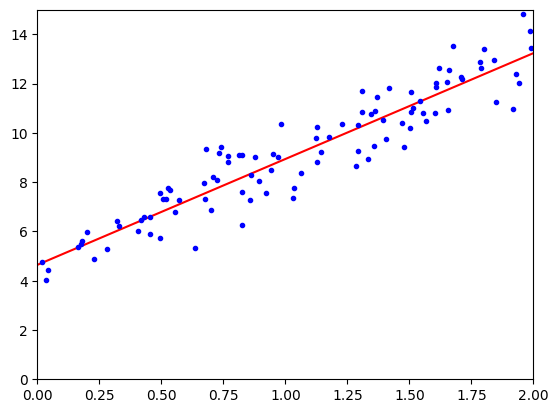

In [20]:
# 绘图进行展示真实的数据点和我们预测用的模型
plt.plot(X_new, y_predict, 'r-') # 'r-' 表示用红色实线绘制。
plt.plot(X, y, 'b.')   # 'b.' 表示用蓝色圆点绘制。
plt.axis([0, 2, 0, 15]) # [0, 2, 0, 15] 表示x轴范围从0到2，y轴范围从0到15。
plt.show()

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

X1 = 2*np.random.rand(100,1)
X2 = 2*np.random.rand(100,1)
X = np.c_[X1,X2]

y = 4 + 3*X1 + 5*X2 + np.random.randn(100,1)

In [26]:
reg = LinearRegression()  # 创建一个线性回归模型的实例
reg.fit(X,y)    # 使用X和y进行拟合，即训练模型
print(reg.intercept_, reg.coef_) # 输出模型的截距和系数

[3.87300809] [[3.16042644 4.98255824]]
